In [1]:
#importing libraries
import pandas as pd
import numpy as np
import statsmodels as st
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.formula.api as sfa
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.api as sa
from sklearn.preprocessing import LabelEncoder
import plotly.express as pe
plt.rcParams['figure.figsize'] = (10,5)
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
data = pd.read_csv('50_Startups.csv')
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
#renaming column for easy approach 
data1= data.rename({'R&D Spend':'R&DS', 'Administration':'admin', 'Marketing Spend':'mktS'}, axis=1)
data1.head(10)

,R&DS,admin,mktS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [5]:
data1[data1.duplicated()]#no duplicate data detected

,R&DS,admin,mktS,State,Profit


In [6]:
data1['State'] = data1['State'].replace({'New York': 0, 'California': 1, 'Florida':2})
data1.head(10)

,R&DS,admin,mktS,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94
5,131876.90,99814.71,362861.36,0,156991.12
6,134615.46,147198.87,127716.82,1,156122.51
7,130298.13,145530.06,323876.68,2,155752.60
8,120542.52,148718.95,311613.29,0,152211.77
9,123334.88,108679.17,304981.62,1,149759.96


In [7]:
#checking for descriptive stats
data1.describe()

,R&DS,admin,mktS,State,Profit
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,0.980000,112012.639200
std,45902.256482,28017.802755,122290.310726,0.820403,40306.180338
min,0.000000,51283.140000,0.000000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,0.000000,90138.902500
50%,73051.080000,122699.795000,212716.240000,1.000000,107978.190000
75%,101602.800000,144842.180000,299469.085000,2.000000,139765.977500
max,165349.200000,182645.560000,471784.100000,2.000000,192261.830000


Text(0.5, 1.0, 'Box Plot for Data Columns')

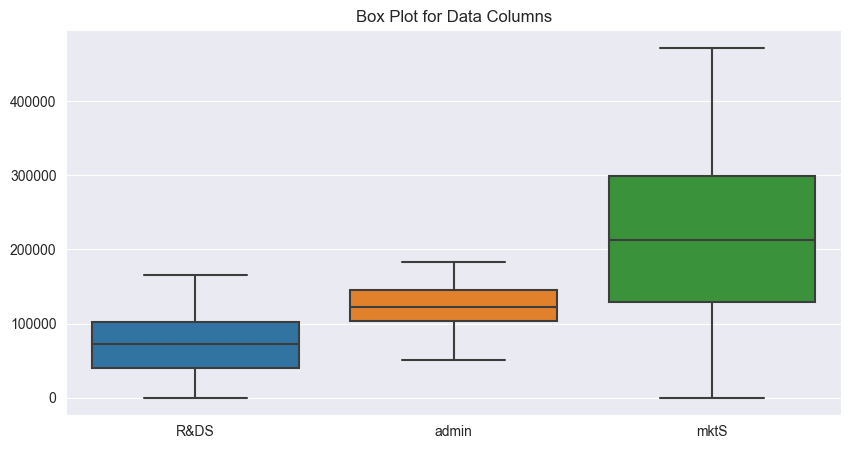

In [8]:
sns.boxplot(data1.iloc[:,:3])
plt.title('Box Plot for Data Columns')#no outliers detected

In [9]:
for i in ['R&DS','admin','mktS']:
    print(f'Skewness for {i} Column : {data1[i].skew()}')

Skewness for R&DS Column : 0.164002172321177
Skewness for admin Column : -0.4890248099671768
Skewness for mktS Column : -0.04647226758360412


# correlation analysis

In [10]:
data1.corr()

,R&DS,admin,mktS,State,Profit
R&DS,1.000000,0.241955,0.724248,0.037930,0.972900
admin,0.241955,1.000000,-0.032154,0.003026,0.200717
mktS,0.724248,-0.032154,1.000000,0.137777,0.747766
State,0.037930,0.003026,0.137777,1.000000,0.048471
Profit,0.972900,0.200717,0.747766,0.048471,1.000000


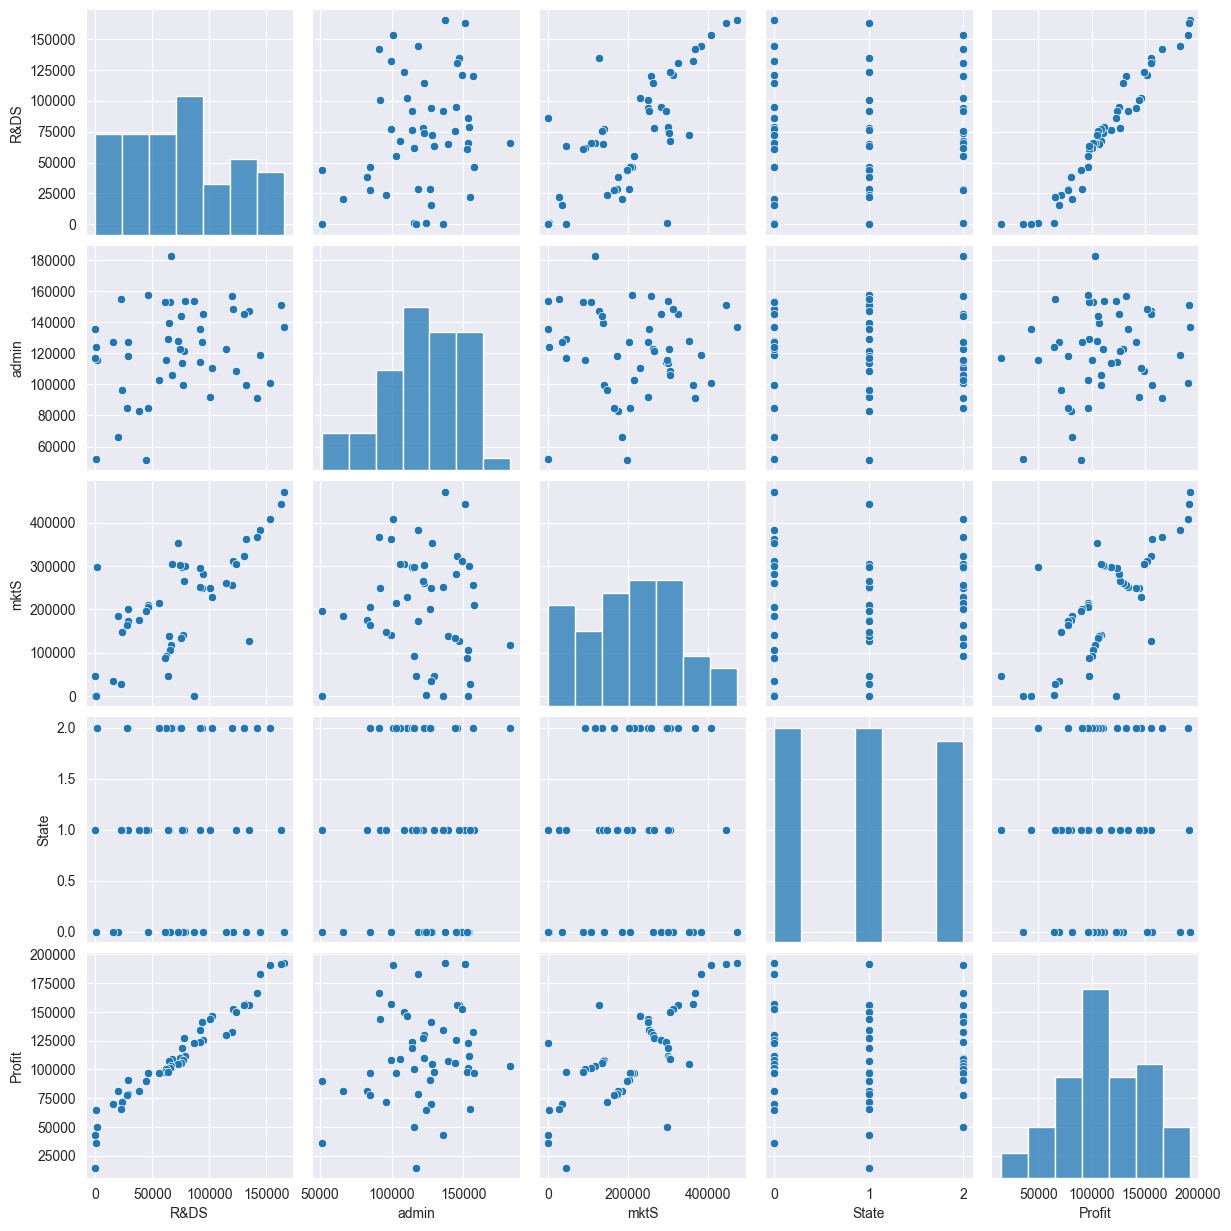

In [11]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

<Axes: >

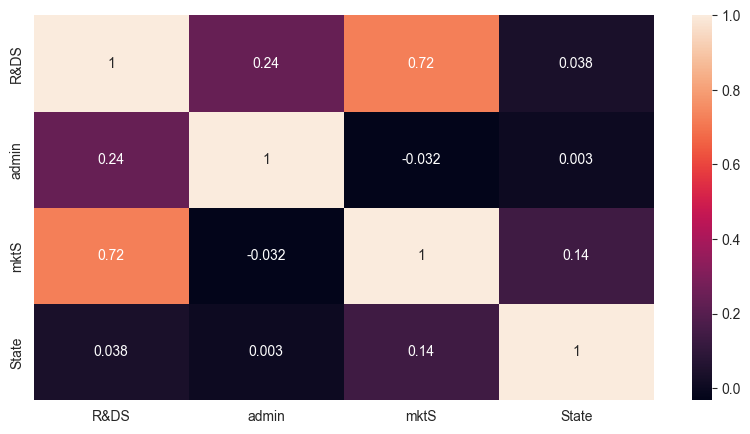

In [12]:
sns.heatmap(data1[[x for x in data1.columns[:-1]]].corr(),annot=True)

# <span style="color:blue; font-family: Arial;">model building</span>

In [13]:
data1.rename(columns={'R&DS':'RD_Spend'},inplace=True)

In [14]:
model = sfa.ols('Profit ~ RD_Spend + admin + mktS + State', data=data1).fit()


In [15]:
model.rsquared

0.9507516438334586

In [16]:
model.pvalues

Intercept    2.322116e-09
RD_Spend     9.017776e-22
admin        6.038483e-01
mktS         1.160794e-01
State        9.430398e-01
dtype: float64

# <span style="color:red; font-family: Arial;">VIF</span>


In [17]:
vif_stat = pd.DataFrame()
vif_stat['Feature'] = data1.columns[:-1]
vif_stat['vif'] = [variance_inflation_factor(data1.values,i) for i in range(len(data1.columns[:-1]))]
vif_stat.head()

,Feature,vif
0,RD_Spend,31.201626
1,admin,13.696879
2,mktS,10.136342
3,State,2.504973


<h1 style="color:blue; font-family: Arial;">Conclusion:</h1>


*<h3 style="color:black; font-family: Arial;"> >RD_Spend column having very high variance_inflation_factor</h3>*


*<h3 style="color:black; font-family: Arial;"> >Administration column having high variance_inflation_factor</h3>*

# <span style="color:red; font-family: Arial;">subset collection</span>

In [18]:
#RD_spend model
rd_model = sfa.ols('Profit ~ RD_Spend  + mktS + State',data=data1).fit()

In [19]:
rd_model.aic,rd_model.rsquared

(1059.0682485663424, 0.9504528023904981)

In [20]:
#Administration model
ad_model = sfa.ols('Profit ~ admin + mktS + State',data=data1).fit()

In [21]:
ad_model.aic,ad_model.rsquared

(1161.850127673729, 0.6129463613830304)

As we can observe R&D spend has high r score and low aic 


<h1 style="color:blue; font-family: Arial;">Conclusion:</h1>


We will use R&D spend for further model process

# Model validation

# <h2 style="color:red; font-family: Arial;">Residual Analysis</h2>

In [22]:
fmodel = sfa.ols('Profit ~ RD_Spend  + mktS + State',data=data1).fit()

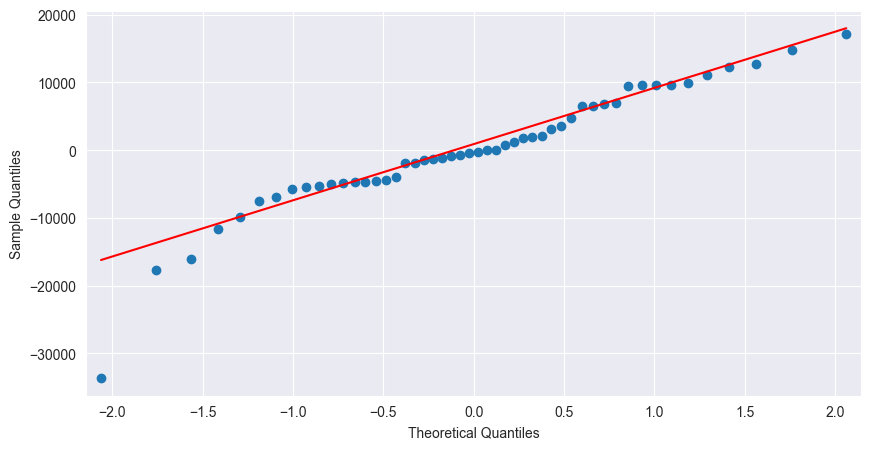

In [23]:
sa.qqplot(fmodel.resid,line='q');

In [24]:
list(np.where(model.resid <-3000))

[array([ 4,  5,  7,  9, 14, 15, 17, 18, 21, 22, 24, 26, 27, 46, 47, 48, 49],
       dtype=int64)]

# Model deletion 
<h4 style="color:black; font-family: Arial;"> Checking for outliers or influencers</h4>

There are two techniques #1_cooks distance ,#2_Leverage value

<h3 style="color:red; font-family: Arial;"> cooks distance</h3>

In [25]:
# If cooks distance > 1, then there's outlier present
inf = fmodel.get_influence()
c,p = inf.cooks_distance

<StemContainer object of 3 artists>

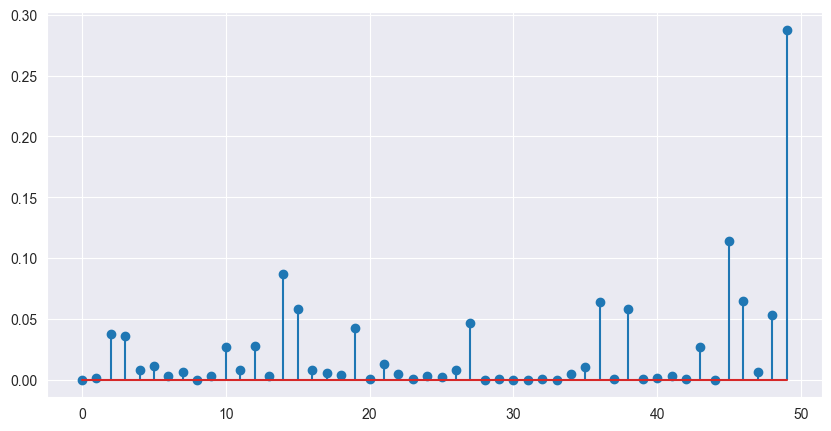

In [26]:
# Plot the influencers using the stem plot
plt.stem(c)

<h4 style="color:black; font-family: Arial;"> No values exceed limit 1</h4>

<h3 style="color:red; font-family: Arial;">Leverage value</h3>

In [28]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.28764654322741334)

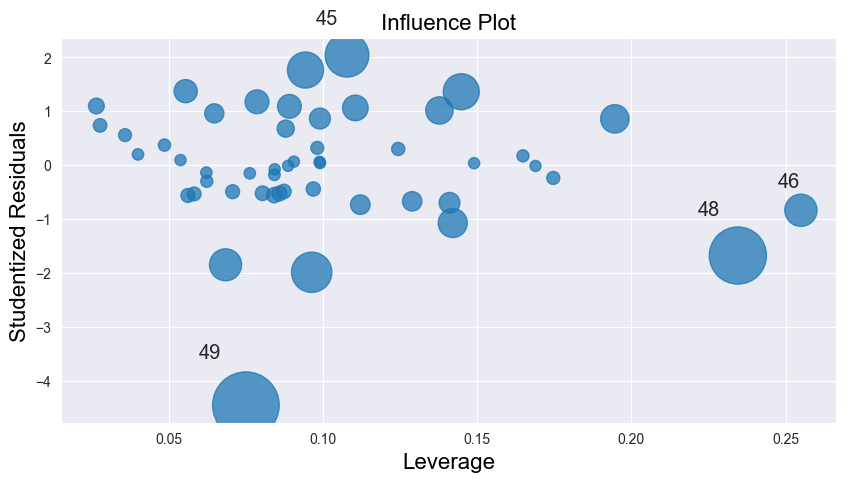

In [27]:
# Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [29]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [30]:
data1[data1.index.isin([49])] 

,RD_Spend,admin,mktS,State,Profit
49,0.0,116983.8,45173.06,1,14681.4


In [32]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
df=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
df.tail()

,RD_Spend,admin,mktS,State,Profit
44,22177.74,154806.14,28334.72,1,65200.33
45,1000.23,124153.04,1903.93,0,64926.08
46,1315.46,115816.21,297114.46,2,49490.75
47,0.00,135426.92,0.00,1,42559.73
48,542.05,51743.15,0.00,0,35673.41


# Sqrt transformation

In [33]:
sq_df = pd.DataFrame()
for i,col in enumerate(df.columns):
    if i < len(df.columns) - 2:
        sq_df[f'log_{col}'] = np.sqrt(df[col])
    else:
        sq_df[col] = df[col]
sq_df.head()

,log_RD_Spend,log_admin,log_mktS,State,Profit
0,406.631529,369.997027,686.865416,0,192261.83
1,403.234051,389.072731,666.257105,1,191792.06
2,391.716109,318.033882,638.697534,2,191050.39
3,379.963696,344.487808,619.031195,0,182901.99
4,376.971272,302.310718,605.118517,2,166187.94


In [38]:
sq_model = sfa.ols('Profit~log_RD_Spend+log_admin+log_mktS+State',data=sq_df).fit()
sq_model.rsquared

0.8966650958449748

# Final Model

In [39]:
final_model = sfa.ols('Profit~RD_Spend+mktS+State',data=df).fit()

In [40]:
final_model.rsquared

0.9611039731246803

In [42]:
dataN = {
    'Model': ['Base Model','R&D Model', 'Administration Model','Sqrt Transformed Model','Final Model'],
    'R^2 Score': [model.rsquared,rd_model.rsquared,ad_model.rsquared,sq_model.rsquared,final_model.rsquared]
}
out_df = pd.DataFrame(dataN)
out_df

,Model,R^2 Score
0,Base Model,0.950752
1,R&D Model,0.950453
2,Administration Model,0.612946
3,Sqrt Transformed Model,0.896665
4,Final Model,0.961104
